# HW3: Mushroom Classification: Poisonous or Edible

## Step 1: Imports and Data Loading

In [35]:
# Imports
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data from kaggle
mushroom_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/mushroom-classification",'mushrooms.csv',)

In [3]:
# See shape
mushroom_df.shape


(8124, 23)

In [4]:
# Preview the data(first 5 rows)
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Preview the last 5 rows
mushroom_df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
# See the different types
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# See unique values in all the columns
for col in mushroom_df.columns:
    print(col,":",mushroom_df[col].unique())


class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
# Checking for missing values
for col in mushroom_df.columns:
    print(col,":",mushroom_df[col].isnull().sum())

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [9]:
# Double-checking for missing values
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing values. Nice !
For now, I will keep all columns, after training and evaluating I will come back and check if any columns should be removed
## Step 2: EDA and Feature Encoding

In [10]:
# Basic Data Summaries
# TODO:
# Add some visualizations here
print(mushroom_df.describe(include='object'))
print(mushroom_df.info())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

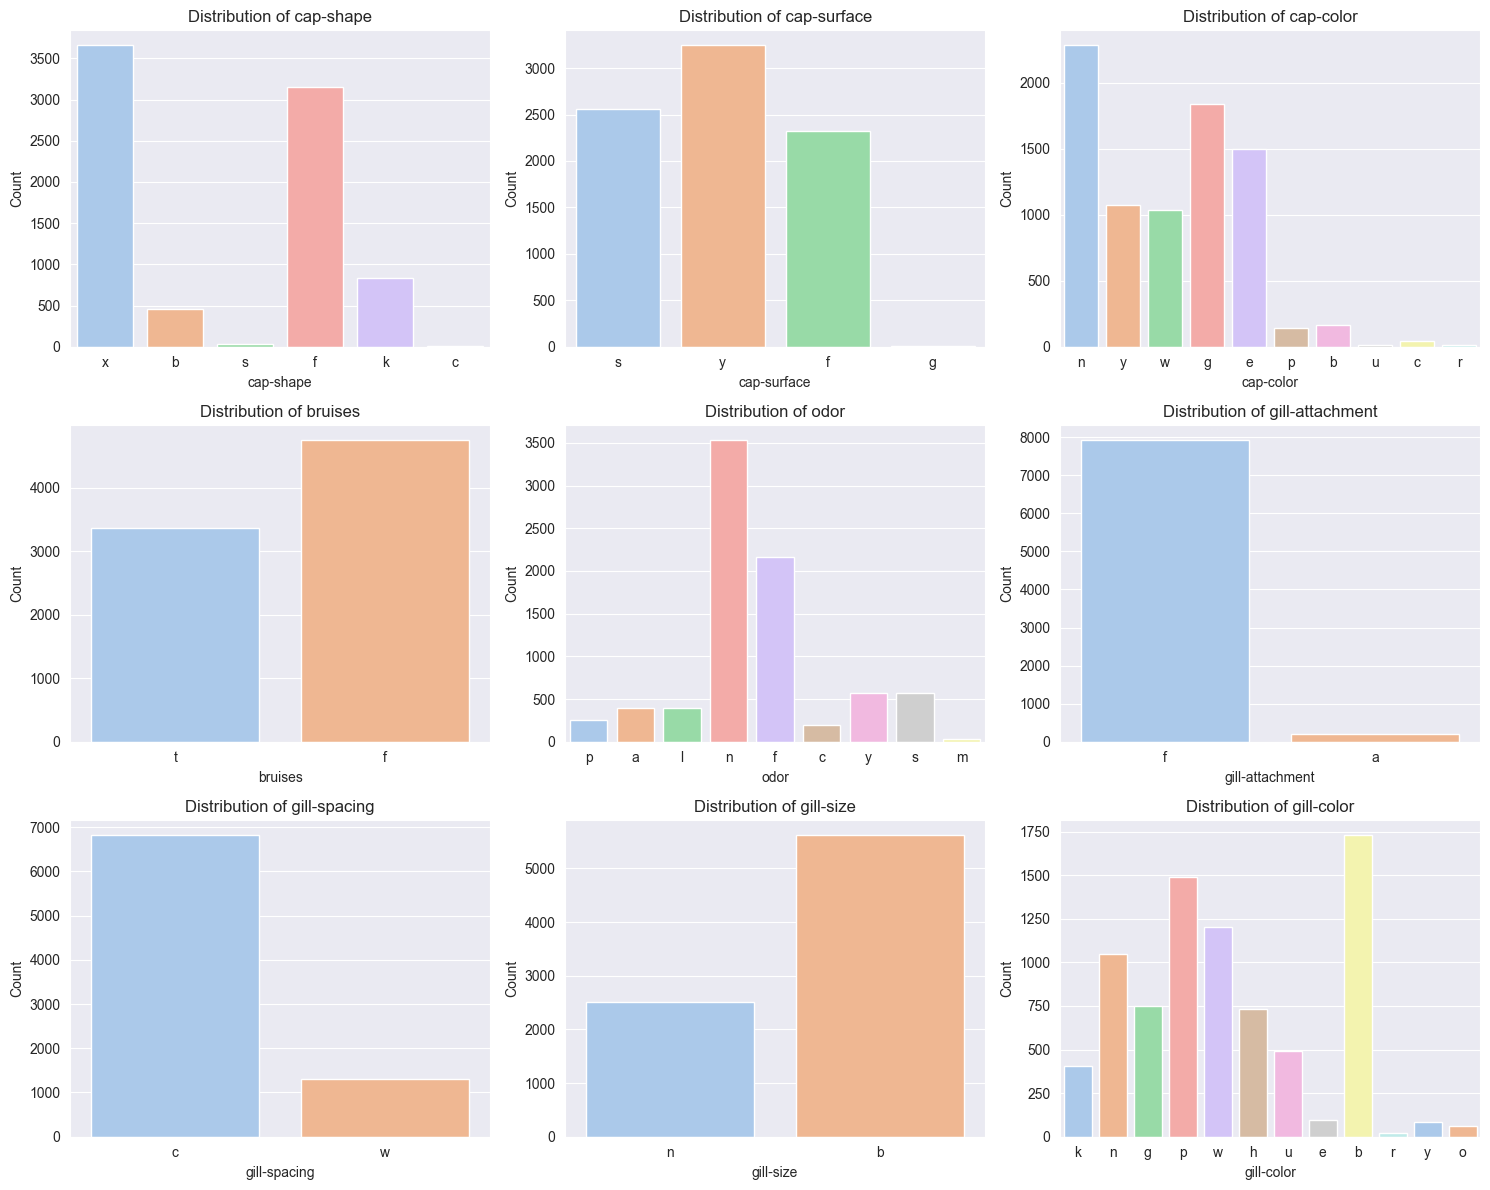

In [11]:
# Plot distributions for all features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(mushroom_df.columns[1:10]):
    sns.countplot(x=col, data=mushroom_df, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

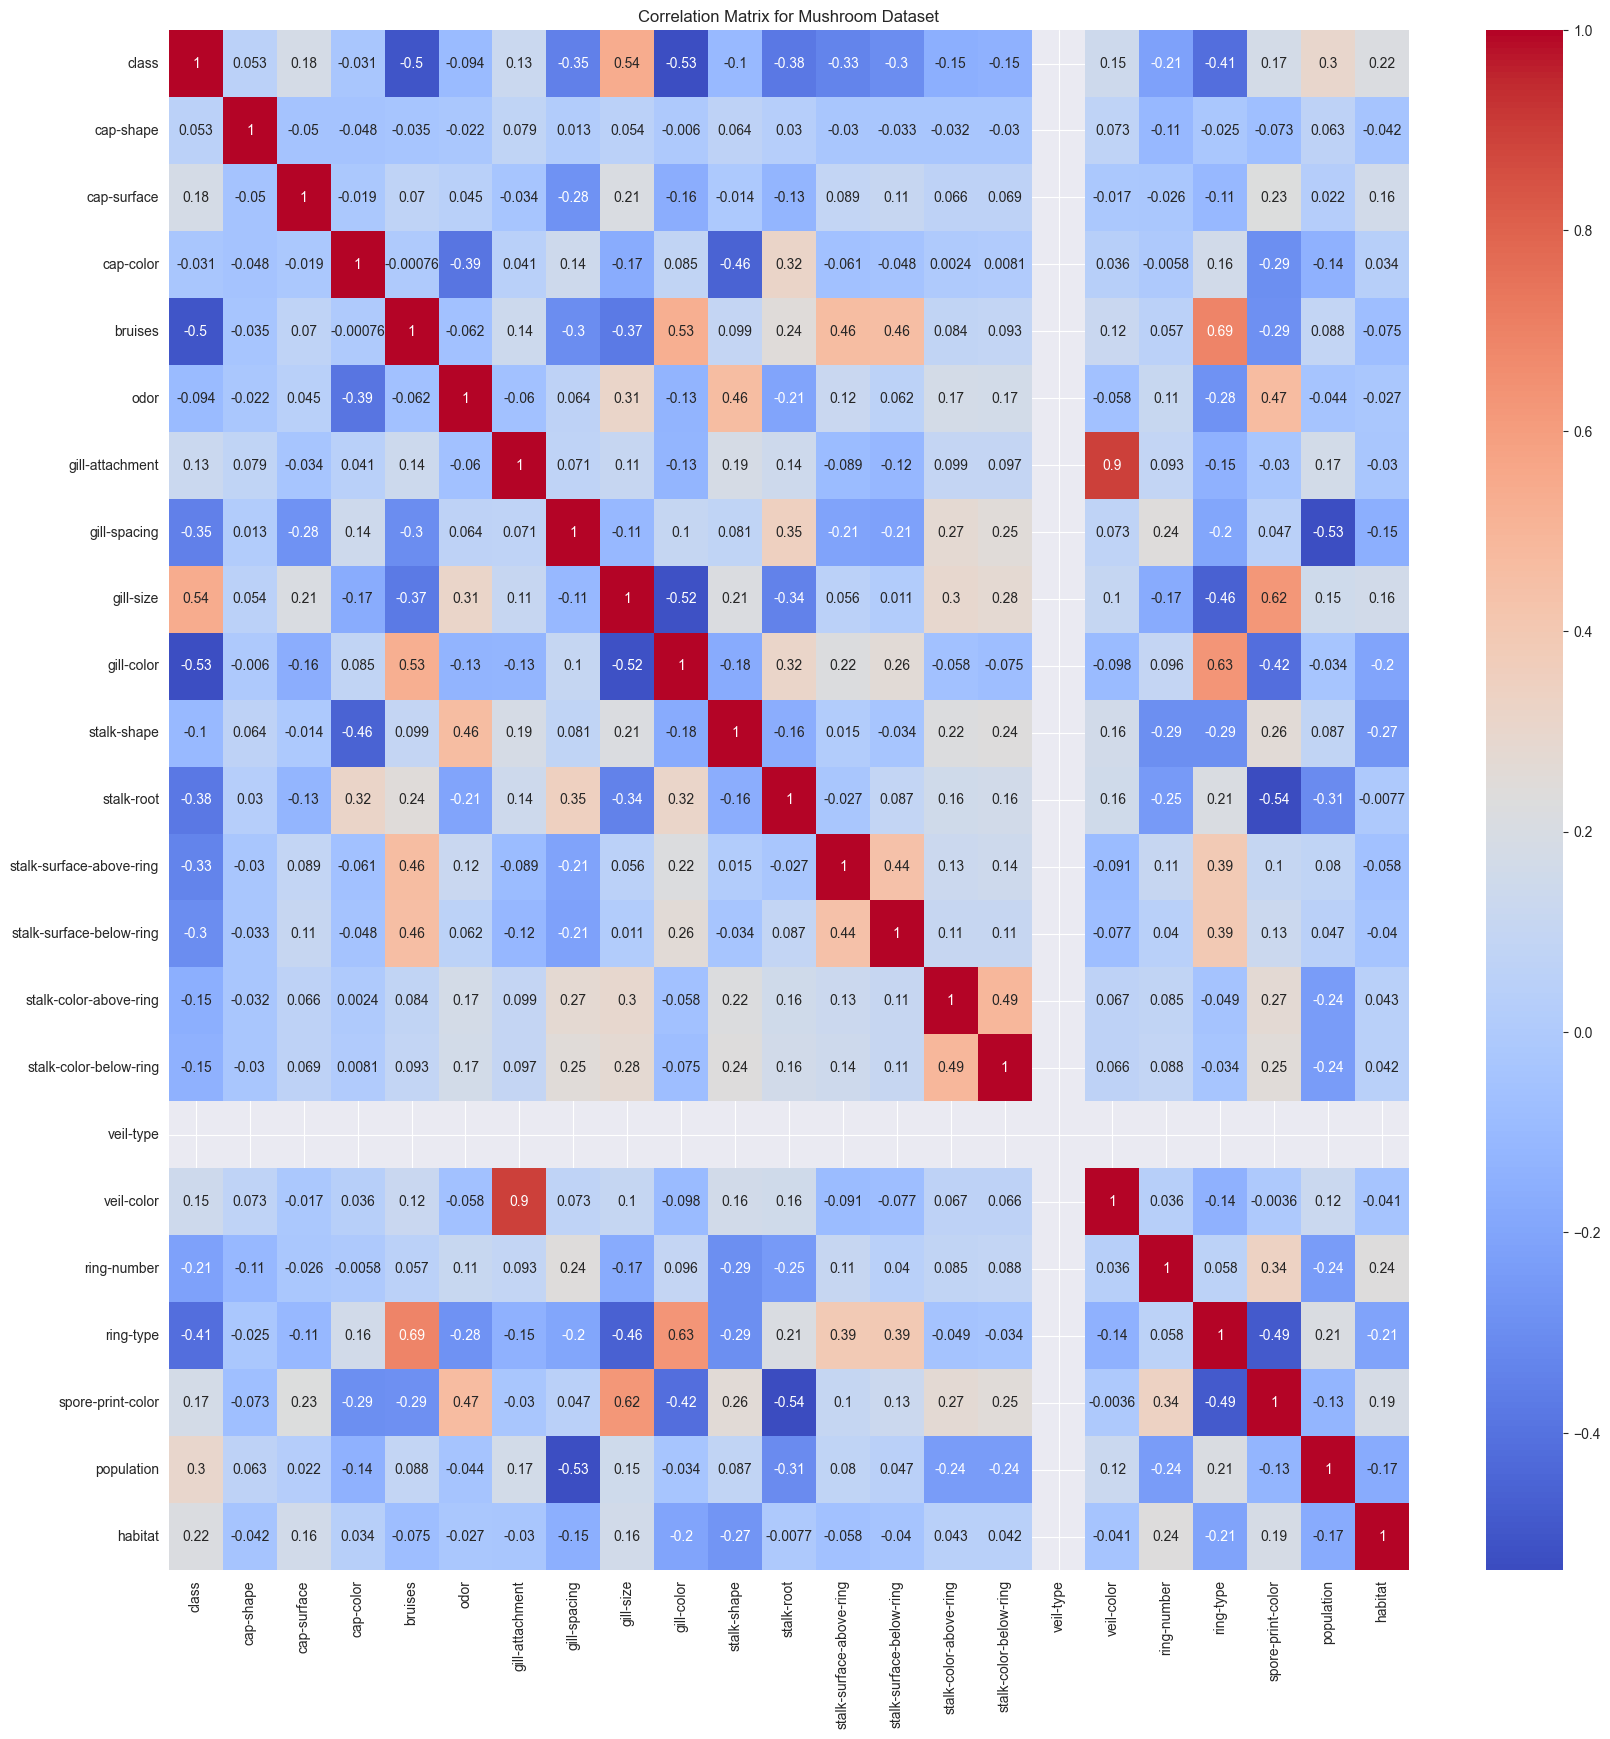

In [12]:
# Find Correlation between features and the target feature

# First the features must be encoded
from sklearn.preprocessing import LabelEncoder
mushroom_df_encoded = mushroom_df.copy()
label_encoder = LabelEncoder()

for col in mushroom_df_encoded.columns:
    mushroom_df_encoded[col] = label_encoder.fit_transform(mushroom_df_encoded[col])

# Create a correlation matrix
corr_matrix = mushroom_df_encoded.corr()

plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix,annot = True ,cmap='coolwarm')
plt.title('Correlation Matrix for Mushroom Dataset')
plt.show()

In [13]:
# Rank the features by correlation
corr = mushroom_df_encoded.corr()
corr['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

So the most correlated features are gill-size, population, habitat, cap-surface, spore-print-color, veil-color, gill -attachment, and cap-shape

However, this is based on encoded features which can be misleading in it's results

In [14]:
# Solution: use Cramers V for correlation(better for categorical features)

from scipy.stats import chi2_contingency

def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramer_scores = {}

for col in mushroom_df.columns:
    if col != 'class':
        cramer_scores[col] = cramers_v(mushroom_df[col], mushroom_df['class'])

# Sort by highest association with the target
sorted_scores = sorted(cramer_scores.items(), key=lambda x: x[1], reverse=True)

for feature, score in sorted_scores:
    print(feature, score)


odor 0.9710054799374739
gill-color 0.6808300468642167
veil-type nan
spore-print-color 0.7526445391581242
ring-type 0.6032714112445607
stalk-surface-above-ring 0.5879436880621963
stalk-surface-below-ring 0.574836914804959
gill-size 0.5397578483204122
stalk-color-above-ring 0.5248500402988231
stalk-color-below-ring 0.5147254184041617
bruises 0.5012804440992892
population 0.48737645241046057
habitat 0.44013578049444047
stalk-root 0.40680458609033493
gill-spacing 0.3480520691828184
cap-shape 0.24557129846865242
cap-color 0.21842667608007765
ring-number 0.21477228240018423
cap-surface 0.19692454173208238
veil-color 0.15342138639266326
gill-attachment 0.1284236613345339
stalk-shape 0.10177041763522614


Using the cramer v method we can see that these features have the highest correlation:
odor 0.6866256893030515
spore-print-color 0.5322164356198092
gill-color 0.48143435838948495
ring-type 0.42659043346418
stalk-surface-above-ring 0.41575176291804156
stalk-surface-below-ring 0.4064835894543152
gill-size 0.38167818031634565
stalk-color-above-ring 0.3711364437656104
stalk-color-below-ring 0.36397703464692827
bruises 0.35446970956948437
population 0.34463780019857065
habitat 0.3112325727434534
stalk-root 0.28766313384133035
gill-spacing 0.24611755222163606

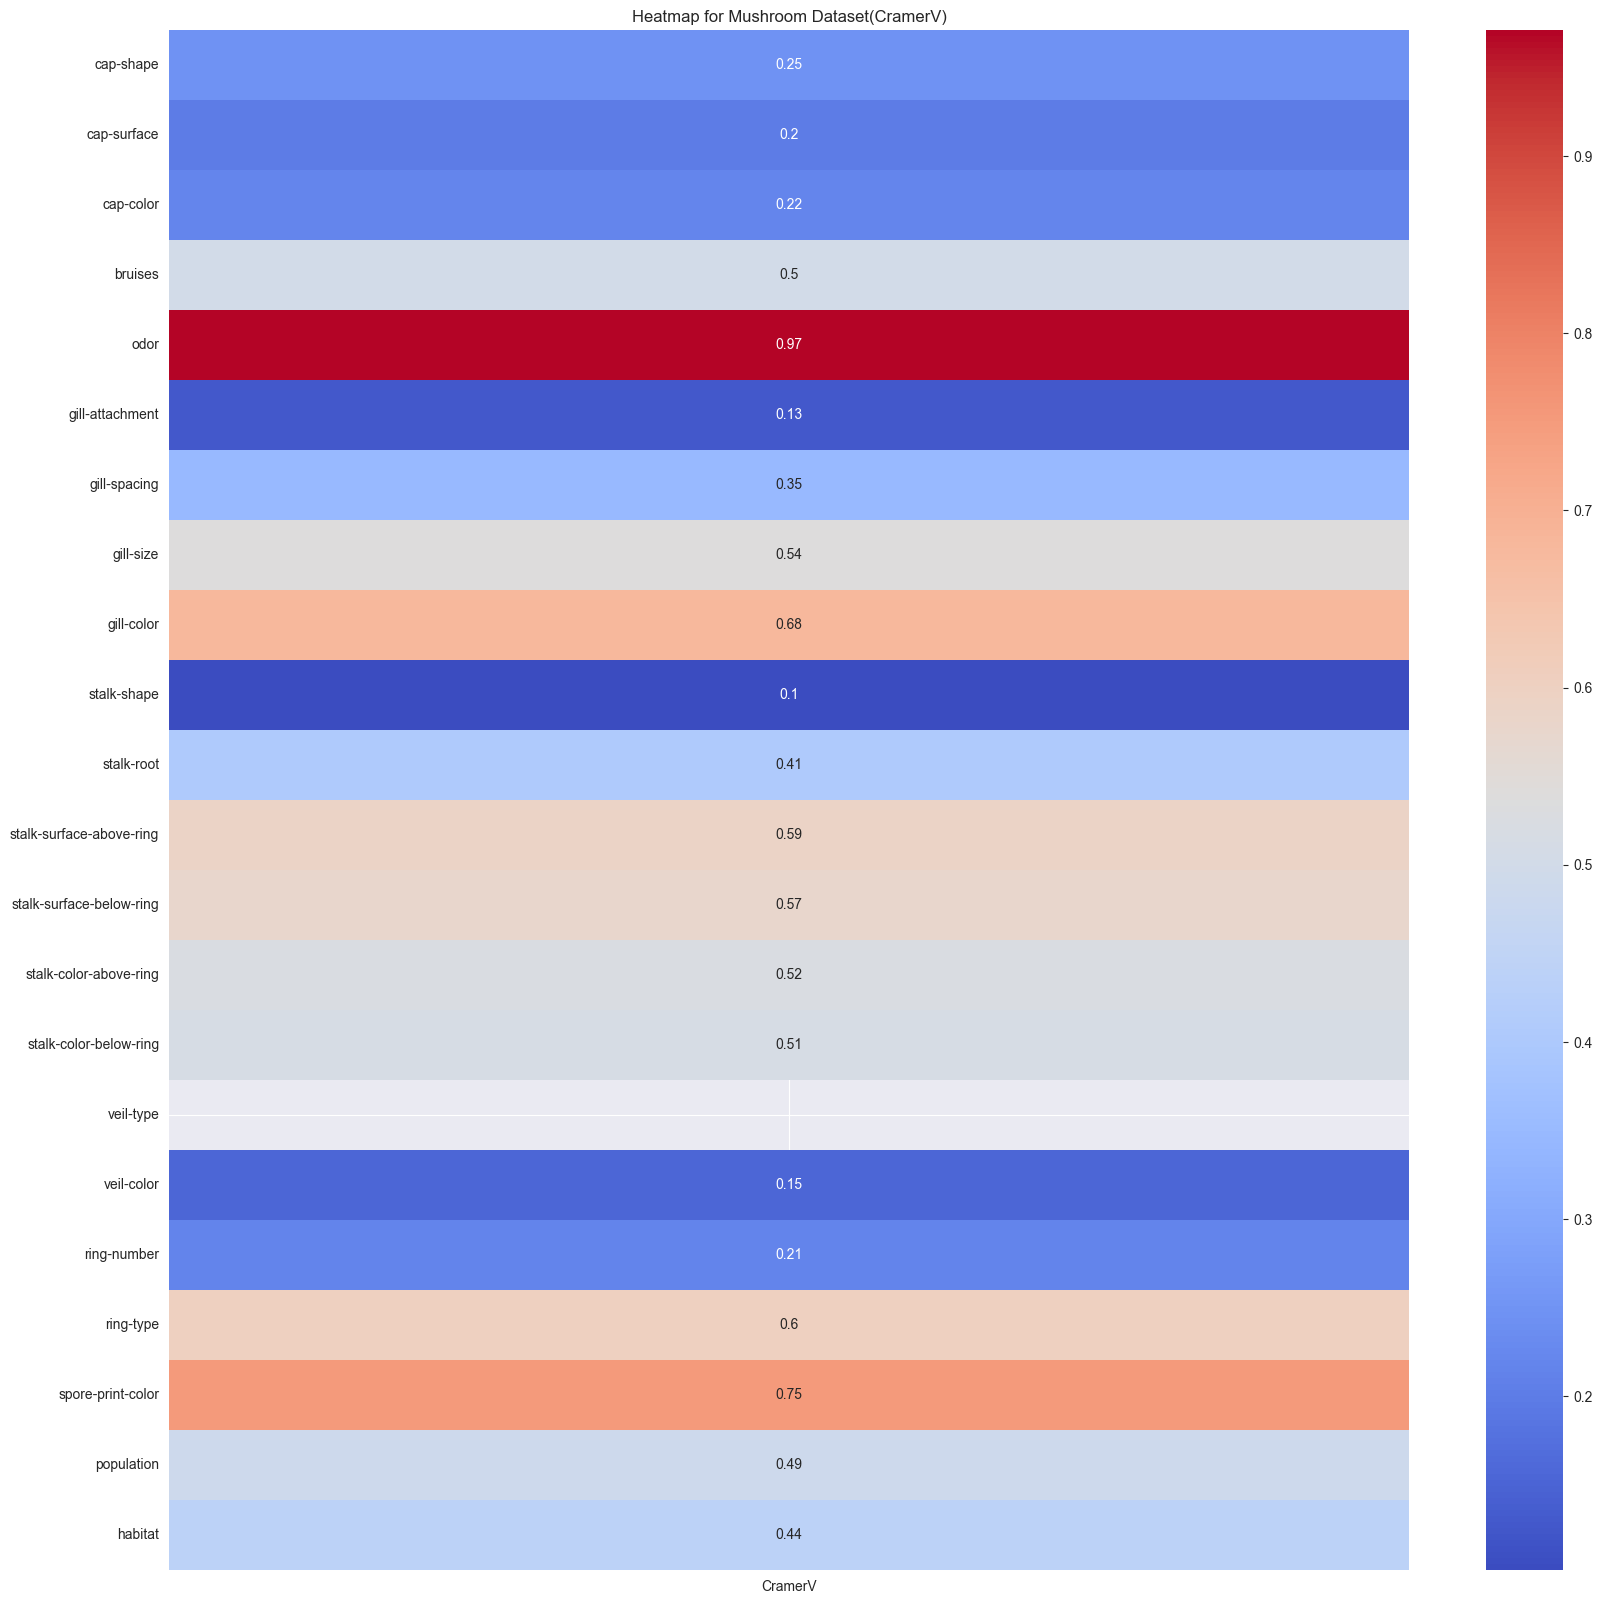

In [15]:
# Let's create a heatmap for these new scores for a visual representation

# Convert to dataframe
temp = pd.DataFrame.from_dict(cramer_scores, orient='index', columns=['CramerV'])

# Create Plot
plt.figure(figsize = (20,20))
sns.heatmap(temp, annot=True, cmap='coolwarm')
plt.title('Heatmap for Mushroom Dataset(CramerV)')
plt.show()
# This one will show the most correlated features but not all

Odor stands out here are the most correlated feature.

## Step 3: Feature Engineering and Encoding
Label Encoding was done with the EDA already. Encoding was needed since the values in this data are categorical. Needs to be converted so that models can trained, tested and evaluated

In [16]:
# Drop the target variable 'class'
X = mushroom_df.drop('class', axis=1)
y = mushroom_df_encoded['class'] # Label encoded

# One hot encode X(the features)
X = pd.get_dummies(X,drop_first=True) # Needed for Logistic Regression

# Let's split the data into a 70/30 split since the data isn't too large(not sure on this)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Step 4: Modeling
This step is when I choose 5 models I want to use. All must be classification models(2 will be ensemble models). I will choose models I've learned about in class making it easier since I am familiar with these models.

List of Models:

1. KNN
2. Logistic Regression
3. Naive Bayes
4. Random Forest
5. AdaBoost

### KNN

Here I didnt use a base model with default hyperparameters since I included 5 which is the default value for k

In [33]:
# Testing different k values
knn_param_grid = {
    'n_neighbors': range(3,5,15)  # Test different values for 3, 5 and 15
}

knn_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the model
knn_grid_search.fit(X_train, y_train)

# Predictions
knn_grid_pred = knn_grid_search.predict(X_test)

# Find the accuracy and print
knn_grid_acc = knn_grid_search.score(X_test, y_test)
print("Accuracy:", knn_grid_acc)

# Classification Report
print(classification_report(y_test, knn_grid_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Logistic Regression

In [19]:
# Initialize a logistic regression model (with default parameters)
lr_model = LogisticRegression(max_iter=10000, random_state=42)

# Fit the model
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Find the accuracy and print
lr_acc = lr_model.score(X_test, y_test)
print("Accuracy:", lr_acc)

# Classification Report
print(classification_report(y_test, lr_pred))

Accuracy: 0.9983593109105825
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [43]:
# Parameters for Linear Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize Linear Regression Model
lr_grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state= 42),
    lr_param_grid,
    cv = 5,
    scoring= 'accuracy'
)

# Fit the model
lr_grid_search.fit(X_train,y_train)

# Predictions
lr_grid_pred = lr_grid_search.predict(X_test)

# Find the accuracy and print
lr_grid_acc = lr_grid_search.score(X_test, y_test)
print("Accuracy:", lr_grid_acc)

# Classification Report
print(classification_report(y_test, lr_grid_pred))



KeyboardInterrupt: 

### Naive Bayes

In [20]:
# Initialize the model(with default parameters)
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Make the predictions
nb_pred = nb_model.predict(X_test)

# Find the accuracy score and print
nb_acc = nb_model.score(X_test, y_test)
print("Accuracy:", nb_acc)

# Classification Report
print(classification_report(y_test, nb_pred))

Accuracy: 0.9405250205086136
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1263
           1       0.89      1.00      0.94      1175

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.95      0.94      0.94      2438



In [26]:
# Initialize NB model with grid search
nb_param_grid = {
    'var_smoothing':[1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
nb_grid_search = GridSearchCV(
    GaussianNB(),
    nb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs= -1,
    verbose=1
)

# Fit the model
nb_grid_search.fit(X_train, y_train)

# Predictions
nb_grid_pred = nb_grid_search.predict(X_test)

# Find the accuracy and print
nb_grid_acc = accuracy_score(y_test, nb_grid_pred)
print("Accuracy:",nb_grid_acc)

# Classification Report
print(classification_report(y_test,nb_grid_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy: 0.9913863822805579
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1263
           1       0.98      1.00      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



### Random Forest

In [30]:
# Initialize Random Forrest (base)
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train,y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Find Accuracy and print
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy", rf_acc)

# Classification Report
print(classification_report(y_test,rf_pred))


Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [28]:
  # Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,              # Use all CPU cores
    verbose=1               # Show progress
)

# Fit on training data
rf_grid_search.fit(X_train, y_train)

# Make predictions
rf_grid_pred = rf_grid_search.predict(X_test)

# Find accuracy and print
rf_grid_acc = accuracy_score(y_test, rf_grid_pred)
print("Accuracy",rf_grid_acc)
print(classification_report(y_test, rf_grid_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### ADA Boost

In [22]:
# Initialize and fit the model(base model)
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
ada_pred = ada_model.predict(X_test)

# Find the accuracy and print
ada_acc = ada_model.score(X_test, y_test)
print("Accuracy:", ada_acc)

# Classification Report
print(classification_report(y_test, ada_pred))

Accuracy: 0.994667760459393
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1263
           1       0.99      0.99      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [31]:
# Initialize AdaBoost with GridSearch
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0]
}

ada_grid_search = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    ada_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
ada_grid_search.fit(X_train, y_train)

# Make predictions
ada_grid_pred = ada_grid_search.predict(X_test)

# Find accuracy and print
ada_grid_acc = accuracy_score(y_test, ada_grid_pred)
print("Accuracy:", ada_grid_acc)

# Classification Report
print(classification_report(y_test,ada_grid_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy: 0.9987694831829368
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Results and Comparison 😁

In [39]:
# Store all the results for the models
tuned_models_results = []
tuned_models = [
    ('KNN', knn_grid_search),
    ('Logistic Regression', lr_grid_search),
    ('Naive Bayes', nb_grid_search),
    ('Random Forest', rf_grid_search),
    ('AdaBoost', ada_grid_search)
]

# Collect results
for name, model in tuned_models:
    y_pred = model.predict(X_test)

    tuned_models_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Best Parameters': str(model.best_params_)
    })

# Create DataFrame
results_df = pd.DataFrame(tuned_models_results)

# Display table
print("=== Model Comparison Table ===")
print(results_df.to_string(index=False))


=== Model Comparison Table ===
              Model  Accuracy  Precision   Recall  F1-Score                                                                      Best Parameters
                KNN  1.000000    1.00000 1.000000  1.000000                                                                   {'n_neighbors': 3}
Logistic Regression  1.000000    1.00000 1.000000  1.000000                                          {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
        Naive Bayes  0.991386    0.98406 0.998298  0.991128                                                             {'var_smoothing': 1e-05}
      Random Forest  1.000000    1.00000 1.000000  1.000000 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
           AdaBoost  0.998769    1.00000 0.997447  0.998722                                          {'learning_rate': 1.0, 'n_estimators': 200}


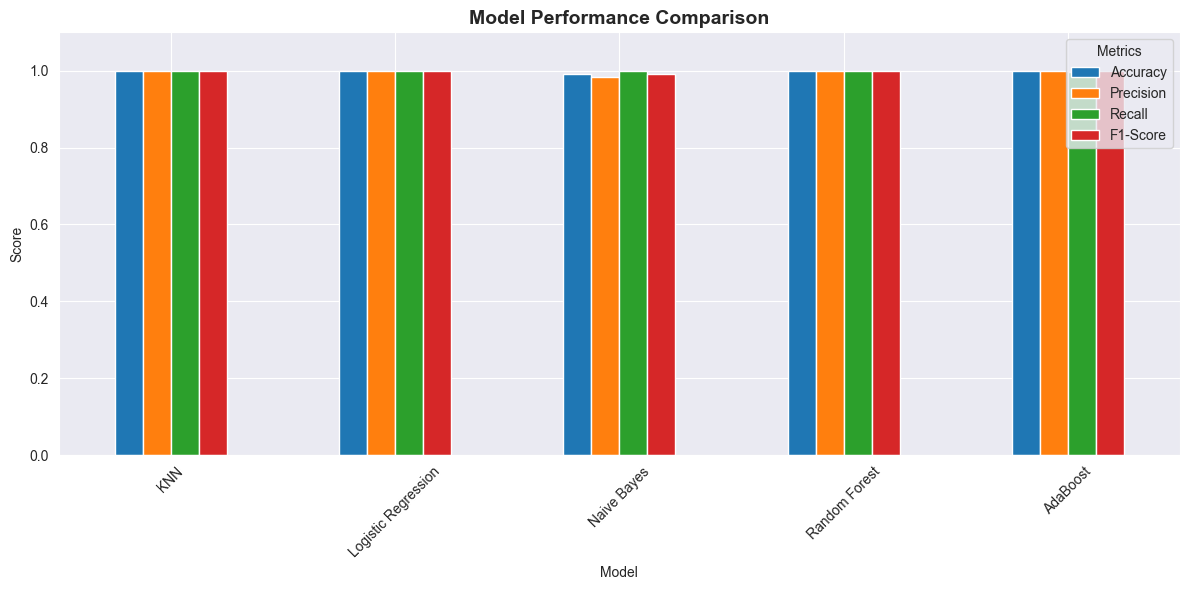

In [40]:
# Visualization 1: Bar chart comparison
plot_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]
plot_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar',
    figsize=(12, 6),
    rot=45
)
plt.title('Tuned Model Performance Comparison')
plt.ylabel('Score')
plt.ylim([0, 1.1])
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

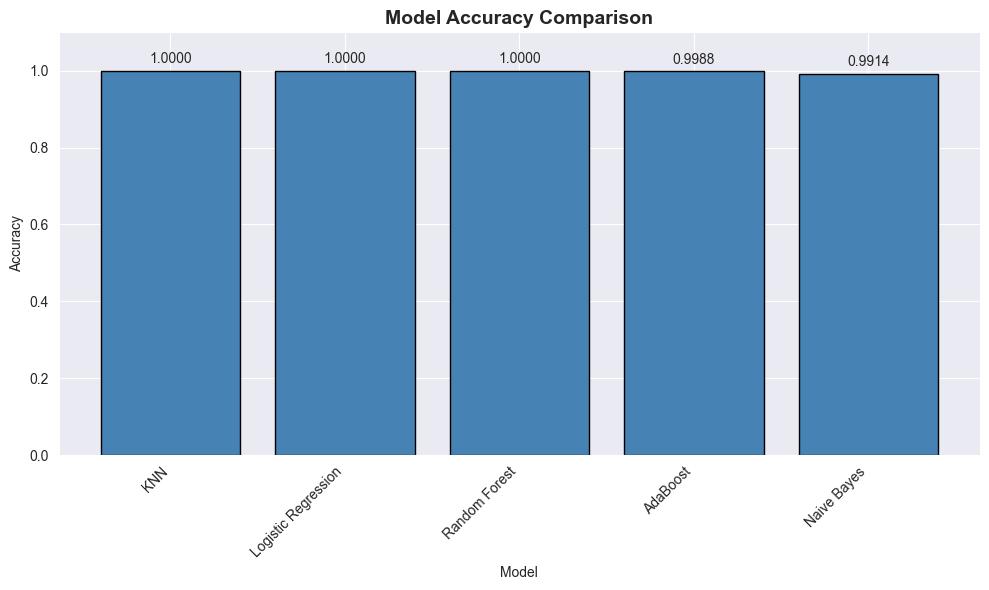

In [41]:
# Visualization 2: Accuracy comparison
sorted_df = results_df.sort_values('Accuracy', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['Model'], sorted_df['Accuracy'], color='steelblue', edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1.1])

# Add value labels
for i, (model, acc) in enumerate(zip(sorted_df['Model'], sorted_df['Accuracy'])):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')

plt.tight_layout()
plt.show()

In [42]:
# Comparison for the base models
# Store all the results for the models
base_models_results = []
base_models = [
    ('KNN', knn_grid_search), # There is no base model for knn
    ('Logistic Regression', lr_model),
    ('Naive Bayes', nb_model),
    ('Random Forest', rf_model),
    ('AdaBoost', ada_model)
]

# Collect results
for name, model in base_models:
    y_pred = model.predict(X_test)

    base_models_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Best Parameters': str(model.best_params_)
    })

# Create DataFrame
base_results_df = pd.DataFrame(base_models_results)

# Display table
print("=== Model Comparison Table ===")
print(base_results_df.to_string(index=False))


NameError: name 'lr_model' is not defined